In [1]:
import numpy as np
import pandas as pd
import os
import gc
from PIL import Image
import matplotlib.pyplot as plt
from tqdm.notebook import trange

In [2]:
FILES_PATH = os.path.join("/", "kaggle", "input", "cat-and-dog")
TRAIN_DATA = os.path.join(FILES_PATH, "training_set", "training_set")
TEST_DATA = os.path.join(FILES_PATH, "test_set", "test_set")

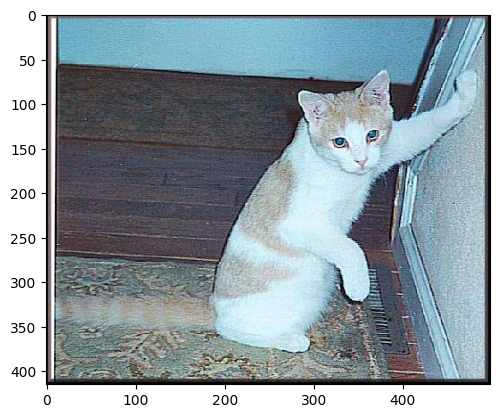

In [3]:
im = Image.open(os.path.join(TEST_DATA, "cats", "cat.4001.jpg"))
data = np.asarray(im)/255.0
plt.imshow(data)

In [7]:
def get_data(path, labels_path, images_path):
    total_files = 500

    images = np.empty((total_files), dtype=np.ndarray)
    labels = np.empty((total_files), dtype=np.uint8)

    iter_i = 0

    for dirname, _, files in os.walk(TRAIN_DATA):
        if not files:
            continue

        for file_i in trange(total_files//2):
            file = files[file_i]
            if(not '.jpg' in file):
                continue

            
                
            label = int('dog' in file)
            labels[iter_i] = label

            image = Image.open(os.path.join(dirname, file)).convert('L')
            width, height = im.size
            image = image.resize((200,200), Image.LANCZOS)
            
            image_normalized = (np.asarray(image)/255.0).astype(np.float32)
            images[iter_i] = image_normalized
            iter_i += 1
            
            if(iter_i == total_files//2+1 and file_i != 0):
                break

    with open(labels_path, 'wb') as file:
        print("saving labels...")
        np.save(file, labels)
    with open(images_path, 'wb') as file:
        print("saving images...")
        np.save(file, images)
    
    labels = None
    images = None
    del labels
    del images
    gc.collect()
    
            

In [8]:
get_data(TRAIN_DATA, "train_labels.npy", "train_images.npy")

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

saving labels...
saving images...


In [9]:
get_data(TEST_DATA, "test_labels.npy", "test_images.npy")

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

saving labels...
saving images...


In [10]:
%%bash
cd /kaggle/working
zip data.zip *

  adding: test_images.npy (deflated 73%)
  adding: test_labels.npy (deflated 88%)
  adding: train_images.npy (deflated 73%)
  adding: train_labels.npy (deflated 88%)
